In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(1)
np.random.seed(852)

In [2]:
class Item: 
    #Python Object for the items availble for selection
    def __init__(self):
        self.weight = np.random.randint(1, 20)
        self.value = np.random.randint(10, 100)

In [3]:
class Knapsack: 
    # Python Object for the possible bag combinations of items that are created through generations
    def __init__(self, number_of_items):
        # Get an array of Boolean for whether to select the item or not
        self.items_selected = np.random.randint(2, size=number_of_items)
    
    def eval_fitness(self, item_list, knapsack_max_weight):
        # Fitness is the sum of weights of selected items
        fitness = 0
        total_weight = 0
        for i in range(len(item_list)):
            fitness += item_list[i].value * self.items_selected[i]
            total_weight += item_list[i].weight * self.items_selected[i]
            if total_weight > knapsack_max_weight:
                fitness = 0
                break
        return fitness

Item	Weight	Value
0	 16	 60
1	 16	 33
2	 19	 70
3	 10	 21
4	 10	 82
5	 16	 31
6	 6	 43
7	 15	 83
8	 6	 89
9	 2	 83
The GA finds that these items maximize the knapsack:
3	10	21
4	10	82
6	6	43
7	15	83
8	6	89
9	2	83
Fitness: 401


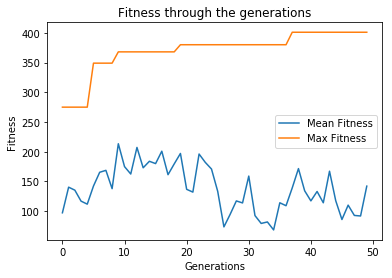

In [4]:
def create_items(number_of_items):
    # Create a set of items with random value and weight
    items = []
    print('Item\tWeight\tValue')
    for i in range(number_of_items):
        item = Item()
        items.append(item)
        print('{0}\t {1}\t {2}'.format(i, item.weight, item.value))
    return items

def sort_knapsacks(population, item_list, knapsack_max_weight):
    # Sort population from lowest to greatest fitness
    return sorted(population, key = lambda knapsack:
                        knapsack.eval_fitness(item_list, knapsack_max_weight)) 

def selection(population, item_list, knapsack_max_weight):
    # Sort population
    population = sort_knapsacks(population, item_list, knapsack_max_weight)
    # Top 10% of the population advances without mutation to the next generation
    return population[int(90*len(population)/100):]

def crossover(parent1, parent2):
    # Function that combines the features from the two individuals
    child = parent1.items_selected.copy()
    for i in range(len(child)):
        prob = random.random() 
        # Select feature from 1st parent
        if prob < 0.45: 
            child[i] = parent1.items_selected[i]
        # Select feature from 2nd parent
        elif prob < 0.9: 
            child[i] = parent2.items_selected[i]
        # Mutate a feature
        else:
            child[i] = np.random.randint(2)

    offspring = Knapsack(len(child))
    offspring.items_selected = child
    return offspring

def main():
    knapsack_max_weight = 50       # Maximum weight of all the selected items
    number_of_items = 10           # Number of items that can be selected
    item_list = create_items(number_of_items) # Set of items that can be selected
    population_size = 20           # Number of knapsack combinations per generation
    generation = 1
    max_generations = 50           # Maximum number of generations to simulate
    population = []                # Set of knapsacks in a generation
    mean_fitness_history = []
    max_fitness_history = []

    # Initialize generation 1 
    for _ in range(population_size): 
        population.append(Knapsack(number_of_items)) 

    # Record fitness measures
    mean_fitness_history.append(sum(knapsack.eval_fitness(item_list, knapsack_max_weight)\
                                    for knapsack in population)/population_size)
    max_fitness_history.append(sort_knapsacks(population, item_list, knapsack_max_weight)[-1]\
                               .eval_fitness(item_list, knapsack_max_weight))
    
    while generation < max_generations:
        ## Selection/Elitism
        new_generation = selection(population, item_list, knapsack_max_weight)
        ## Crossover & Mutation
        # 90% other individuals are created through crossover between best 50% of current generation
        cutoff = int((90*population_size)/100)
        top50 = population[int(population_size*0.5):]
        for _ in range(cutoff): 
            parent1 = random.choice(top50) 
            parent2 = random.choice(top50) 
            new_generation.append(crossover(parent1, parent2)) 
        
        population = new_generation 
        # Record fitness measures
        
        mean_fitness_history.append(sum(knapsack.eval_fitness(item_list, knapsack_max_weight)\
                                        for knapsack in population)/ population_size)
        max_fitness_history.append(sort_knapsacks(population, item_list, knapsack_max_weight)[-1]\
                                   .eval_fitness(item_list, knapsack_max_weight))

        generation += 1
        
    optimal = sorted(population, key = lambda knapsack:
                        knapsack.eval_fitness(item_list, knapsack_max_weight))[-1]

    print('The GA finds that these items maximize the knapsack:')
    for i in range(number_of_items):
        if optimal.items_selected[i]:
            print('{0}\t{1}\t{2}'.format(i, item_list[i].weight, item_list[i].value))
    print('Fitness: {}'.format(optimal.eval_fitness(item_list, knapsack_max_weight)))

    plt.plot(list(range(max_generations)), mean_fitness_history, label = 'Mean Fitness')
    plt.plot(list(range(max_generations)), max_fitness_history, label = 'Max Fitness')
    plt.legend()
    plt.title('Fitness through the generations')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

main() 